# ASA CW1 Script

## 1. Data cleaning

read datasets and check meaningless values (e.g. NaN and quantity < 0)

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df_baskets = pd.read_csv('./data/baskets_sample.csv')
df_customer = pd.read_csv('./data/customers_sample_3.csv')
df_category_spends = pd.read_csv('./data/category_spends_sample_3.csv')
df_lineitems = pd.read_csv('./data/lineitems_sample.csv')

In [2]:
print(df_baskets.isnull().sum(axis=0))
print(df_customer.isnull().sum(axis=0))
print(df_category_spends.isnull().sum(axis=0))
print(df_lineitems.isnull().sum(axis=0))

customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64
customer_number     0
baskets             0
total_quantity      0
average_quantity    0
total_spend         0
average_spend       0
dtype: int64
customer_number         0
BAKERY                  0
CASHPOINT               0
CONFECTIONARY           0
DAIRY                   0
DELI                    0
DISCOUNT_BAKERY         0
DRINKS                  0
FROZEN                  0
FRUIT_VEG               0
GROCERY_FOOD            0
GROCERY_HEALTH_PETS     0
LOTTERY                 0
MEAT                    0
NEWSPAPERS_MAGAZINES    0
PRACTICAL_ITEMS         0
PREPARED_MEALS          0
SEASONAL_GIFTING        0
SOFT_DRINKS             0
TOBACCO                 0
WORLD_FOODS             0
dtype: int64
customer_number    0
purchase_time      0
product_id         0
category           0
quantity           0
spend              0
dtype: int64


In [3]:
print(df_baskets.min())
print(df_customer.min())
print(df_category_spends.min())
print(df_lineitems.min())

customer_number                       14
purchase_time        2007-03-01 07:06:00
basket_quantity                      -11
basket_spend                      -£0.12
basket_categories                      1
dtype: object
customer_number     14.00
baskets              1.00
total_quantity       6.00
average_quantity     1.20
total_spend          7.28
average_spend        1.46
dtype: float64
customer_number         14.0
BAKERY                   0.0
CASHPOINT                0.0
CONFECTIONARY            0.0
DAIRY                    0.0
DELI                     0.0
DISCOUNT_BAKERY          0.0
DRINKS                   0.0
FROZEN                   0.0
FRUIT_VEG                0.0
GROCERY_FOOD             0.0
GROCERY_HEALTH_PETS      0.0
LOTTERY                  0.0
MEAT                     0.0
NEWSPAPERS_MAGAZINES     0.0
PRACTICAL_ITEMS          0.0
PREPARED_MEALS           0.0
SEASONAL_GIFTING         0.0
SOFT_DRINKS              0.0
TOBACCO                  0.0
WORLD_FOODS              0.0
d

It is found that there are some negative values in ***baskets*** dataset and ***lineitems*** dataset. Since ***lineitems*** dataset is not used (too huge), *basket_quantity* less than or equal to zero in ***baskets*** will be deleted. Because a negative or zero *basket_spend* might be meaningful (cash back, lucky draw, etc), *basket_spend* is not dealt with.

In [4]:
df_baskets = df_baskets[df_baskets['basket_quantity'] > 0]
df_baskets

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1
...,...,...,...,...,...
195542,5107,2007-08-31 21:40:00,6,£9.66,3
195543,1988,2007-08-31 21:45:00,12,£14.98,6
195544,3028,2007-08-31 21:46:00,6,£6.21,2
195545,7191,2007-08-31 21:46:00,7,£6.30,3


In [5]:
# type check
df_baskets.dtypes

customer_number       int64
purchase_time        object
basket_quantity       int64
basket_spend         object
basket_categories     int64
dtype: object

In order to calculate more conveniently in clustering, type of *purchase_time* and *basket_spend* should be processed based on the results.

In [6]:
# delete '£' and transform type to float
df_baskets['basket_spend'] = df_baskets['basket_spend'].str.replace('£', '').astype(float)
# transform type to datetime
df_baskets['purchase_time'] = pd.to_datetime(df_baskets['purchase_time'])
df_baskets.dtypes

customer_number               int64
purchase_time        datetime64[ns]
basket_quantity               int64
basket_spend                float64
basket_categories             int64
dtype: object

In [7]:
# check of unique customers
print(df_baskets['customer_number'].nunique())
print(df_baskets.shape)

3000
(195509, 5)


In [8]:
# find max purchase time and define "today"
print(df_baskets['purchase_time'].max())

2007-08-31 21:55:00


In [9]:
import datetime as dt

max_time = dt.datetime(2007, 9, 1)

In [10]:
# feature extraction
df_behaviour = df_baskets.groupby('customer_number').agg({
    'basket_spend': lambda x: x.sum(),  # total spend
    'basket_quantity': lambda x: x.sum(),    # total quantity
    'purchase_time': lambda x: (max_time - x.max()).days,    # recency
    'basket_categories': lambda x: len(x),    # frequency
    })

In [11]:
df_behaviour

,basket_spend,basket_quantity,purchase_time,basket_categories
customer_number,,,,
14,675.72,531,1,56
45,585.73,655,1,33
52,222.18,294,2,59
61,547.87,499,3,37
63,293.34,281,7,48
...,...,...,...,...
16295,679.70,322,0,54
16301,251.43,268,4,42
16303,354.32,331,11,56


In [12]:
# rename and average calculate
df_behaviour.rename(columns={
    'basket_spend': 'total_spend',
    'basket_quantity': 'total_quantity',
    'purchase_time': 'recency',
    'basket_categories': 'number_of_visits'
}, inplace=True)

df_behaviour['avg_spend_per_item'] = df_behaviour['total_spend'] / df_behaviour['total_quantity']
df_behaviour['avg_basket_spend'] = df_behaviour['total_spend'] / df_behaviour['number_of_visits']
df_behaviour['avg_item_count'] = df_behaviour['total_quantity'] / df_behaviour['number_of_visits']
df_behaviour.drop('total_quantity', 1, inplace=True)

df_behaviour

,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
customer_number,,,,,,
14,675.72,1,56,1.272542,12.066429,9.482143
45,585.73,1,33,0.894244,17.749394,19.848485
52,222.18,2,59,0.755714,3.765763,4.983051
61,547.87,3,37,1.097936,14.807297,13.486486
63,293.34,7,48,1.043915,6.111250,5.854167
...,...,...,...,...,...,...
16295,679.70,0,54,2.110870,12.587037,5.962963
16301,251.43,4,42,0.938172,5.986429,6.380952
16303,354.32,11,56,1.070453,6.327143,5.910714


In [13]:
# some of statistical information
df_behaviour.describe()

,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,769.441897,8.121333,65.169667,1.394876,14.804509,11.275683
std,552.767925,20.938531,47.452181,0.567467,11.161734,8.538450
min,7.280000,0.000000,1.000000,0.558163,1.456000,1.200000
25%,406.120000,0.000000,32.000000,1.070830,8.036819,6.119503
50%,627.170000,2.000000,53.000000,1.251716,11.770923,8.732520
75%,957.675000,6.000000,86.000000,1.533358,17.442119,13.394643
max,6588.650000,164.000000,374.000000,7.919243,152.621667,90.750000


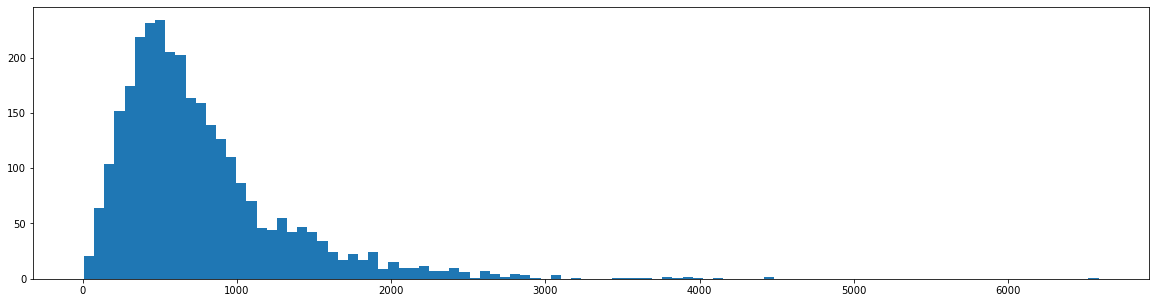

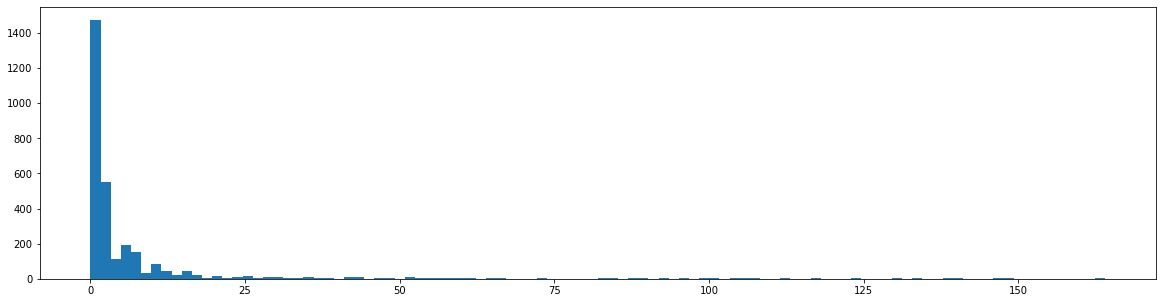

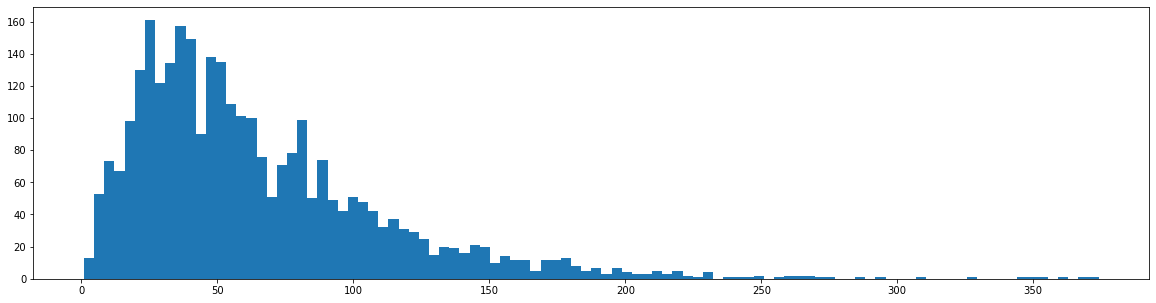

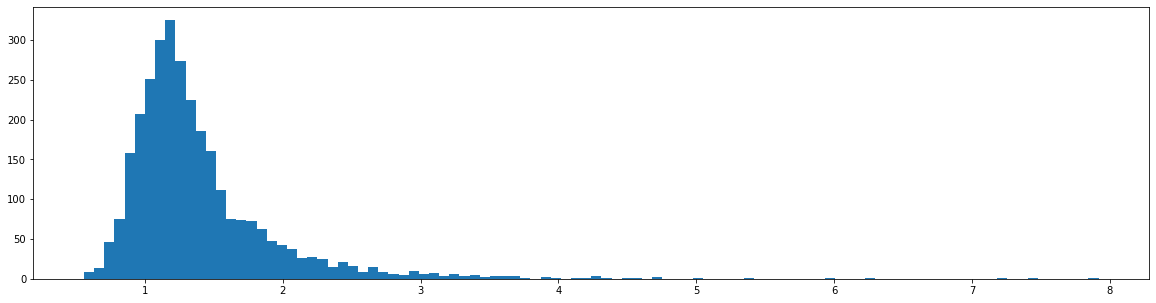

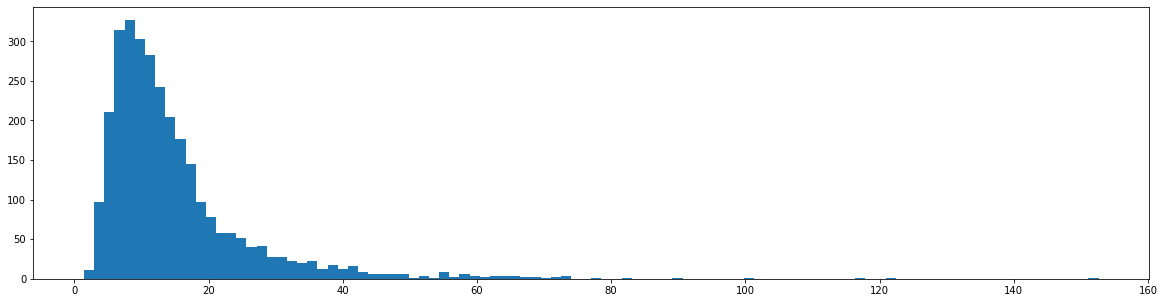

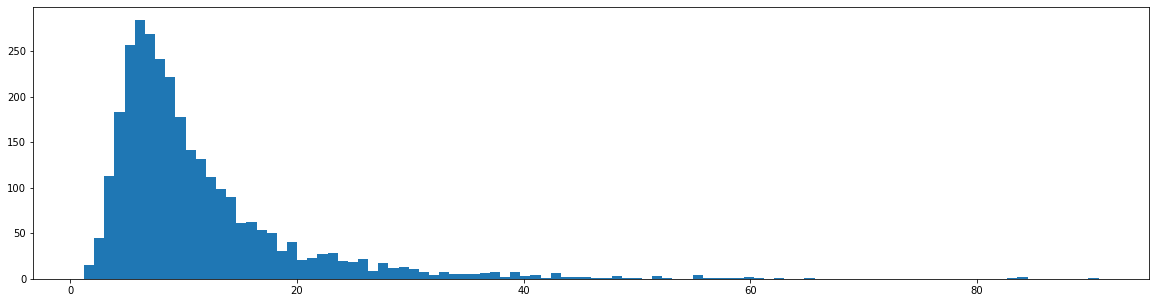

In [14]:
# some visualization of each feature
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.hist(df_behaviour['total_spend'], 100)
plt.show()

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.hist(df_behaviour['recency'], 100)
plt.show()

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.hist(df_behaviour['number_of_visits'], 100)
plt.show()

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.hist(df_behaviour['avg_spend_per_item'], 100)
plt.show()

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.hist(df_behaviour['avg_basket_spend'], 100)
plt.show()

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.hist(df_behaviour['avg_item_count'], 100)
plt.show()

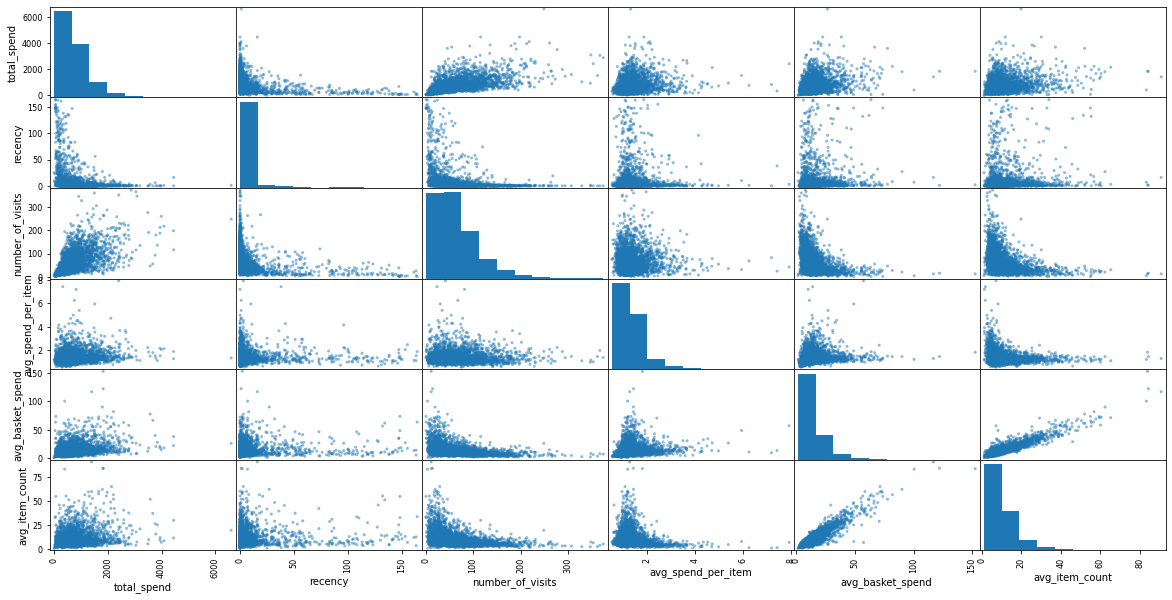

In [15]:
scatter = pd.plotting.scatter_matrix(df_behaviour, figsize=(20, 10))

To make data distributed more normally, the data is standardized to (0, 1) and logged

,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.175110,0.068130,0.246502,0.173252,0.136148,0.168953
std,0.109670,0.149129,0.153513,0.097741,0.097406,0.119669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.099058,0.000000,0.133487,0.113035,0.072138,0.090202
50%,0.150007,0.020738,0.214745,0.150052,0.110869,0.134997
75%,0.221648,0.060967,0.330429,0.205092,0.166964,0.210253
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


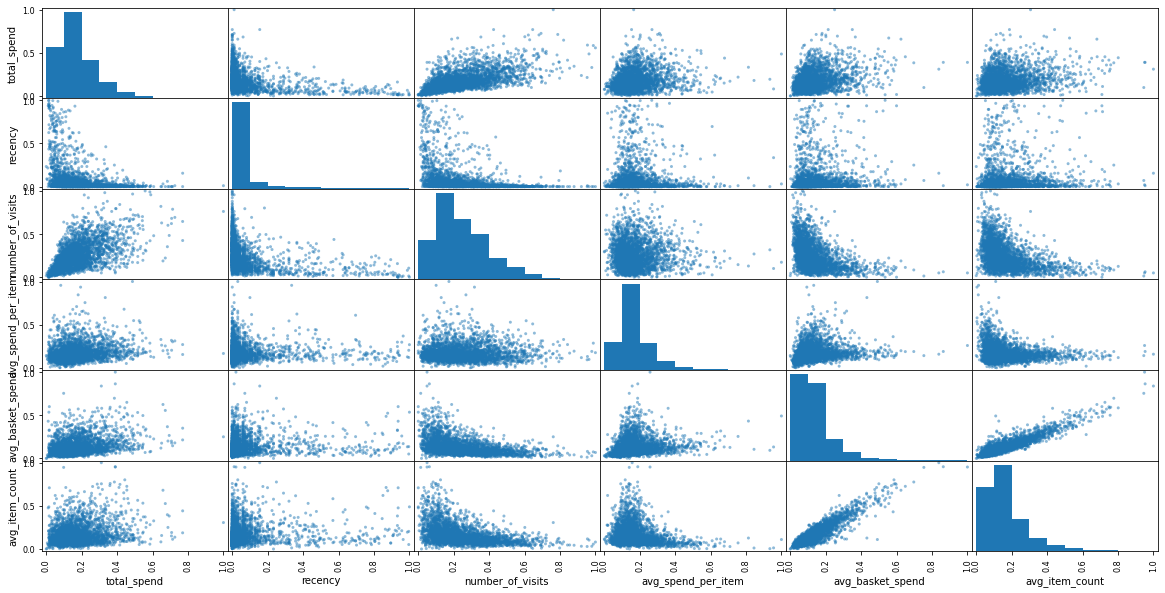

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# scale to [1, e] so that the final data is [0, 1]
scaler = MinMaxScaler((1, np.e))
std_df = pd.DataFrame(scaler.fit_transform(df_behaviour), columns=df_behaviour.columns)

std_df = np.log(std_df)
std_df.set_index(df_behaviour.index.values, inplace=True)
scatter = pd.plotting.scatter_matrix(std_df, figsize=(20, 10))
std_df.describe()

## 2. Clustering

This part uses PCA and K-means clustering.

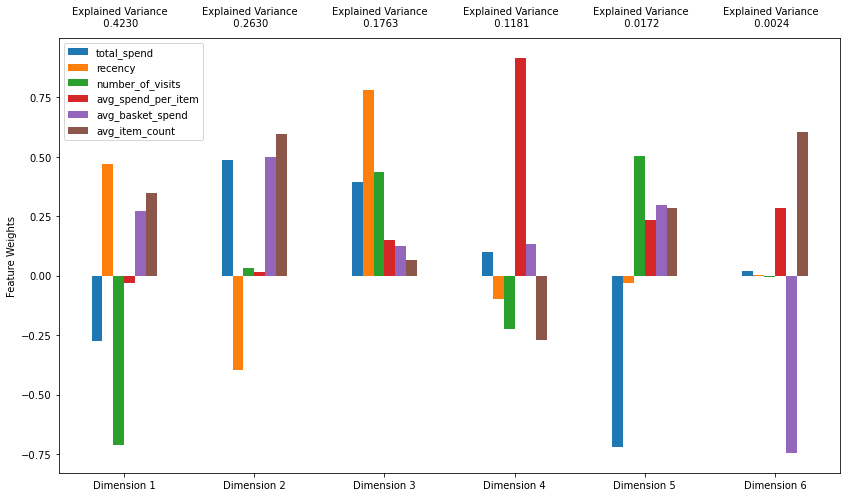

In [17]:
from sklearn.decomposition import PCA
import renders as rs

pca = PCA(n_components=6)
pca.fit(std_df)

pca_results = rs.pca_results(std_df, pca)

Since 86.23% of the variance in the data is explained by the first four principal components, n is selected as 3.

In [18]:
pca = PCA(n_components=3)
pca.fit(std_df)

reduced_df = pca.transform(std_df)
reduced_df = pd.DataFrame(reduced_df)

K selection with visualization of silhouette score

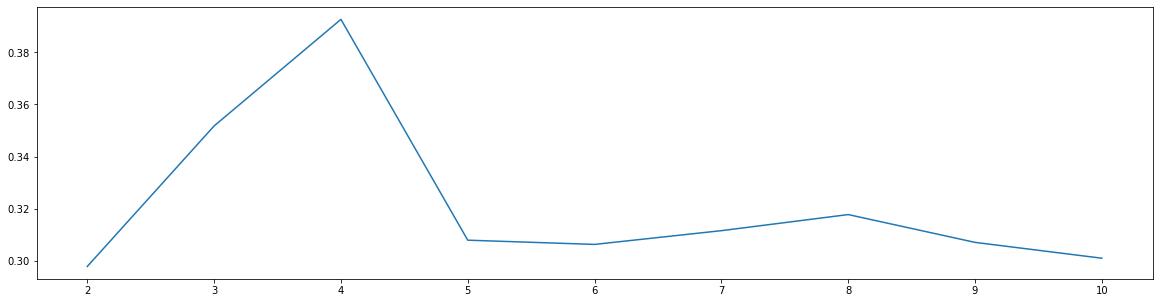

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
range_score = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_df)
    preds = clusterer.predict(reduced_df)
    centres = clusterer.cluster_centers_
    score = silhouette_score(reduced_df, preds, metric='euclidean')
    range_score.append(score)

plt.plot(range_n_clusters, range_score)

Therefore, there should be 4 clusters

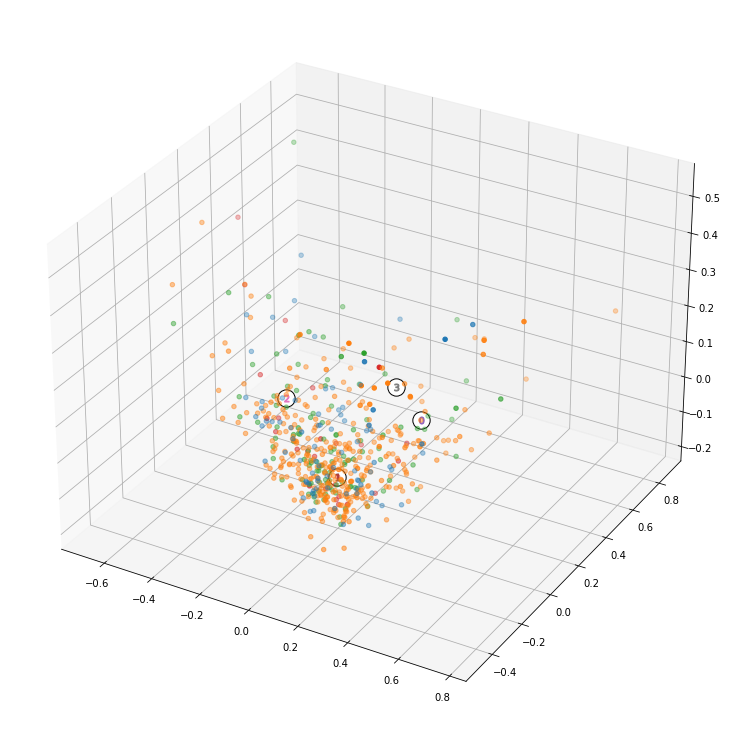

In [49]:
# Visualization of 4-Means

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

clusterer = KMeans(n_clusters=4).fit(reduced_df)
preds = clusterer.predict(reduced_df)
centres = clusterer.cluster_centers_

assignments = pd.DataFrame(preds, columns=['Cluster'], index=df_behaviour.index.values)

plot_data = pd.concat([assignments, reduced_df], axis=1)

plt.rcParams['figure.figsize'] = (20.0, 10.0)

for i, c in plot_data.groupby('Cluster'):
    ax.scatter(c[0], c[1], c[2])

# -- Plot where the cluster centers are
for i, c in enumerate(centres):
    ax.scatter(xs=c[0], ys=c[1], zs=c[2], color='white', edgecolors='black', marker='o', s=300);
    ax.scatter(xs=c[0], ys=c[1], zs=c[2], marker='${}$'.format(i), alpha=1, s=50);   

Output statistical information of each cluster.

**n.b. If re-run the script, the order of cluster may be changed but clusters are still same. So cluster can be recognised by quantity of each cluster.**

In [50]:
# describe of eac h cluster
final_assigments = pd.concat([assignments, df_behaviour], axis = 1)

for c, d in final_assigments.groupby('Cluster'):  
    print("SEGMENT", c)
    display(d.describe())

SEGMENT 0


,Cluster,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
count,396.0,396.00000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,0.0,1092.51851,5.661616,33.133838,1.348144,35.304129,27.209674
std,0.0,625.86547,7.619538,18.305696,0.513232,15.370130,11.358580
min,0.0,129.77000,0.000000,4.000000,0.748651,18.376522,7.238095
25%,0.0,653.31750,1.000000,20.000000,1.125648,25.483562,20.147439
50%,0.0,944.03000,3.000000,29.000000,1.268210,30.916078,23.869748
75%,0.0,1397.04250,7.000000,42.000000,1.446193,39.684997,30.453333
max,0.0,4448.19000,51.000000,116.000000,7.919243,152.621667,90.750000


SEGMENT 1


,Cluster,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
count,1614.0,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,1.0,510.642503,4.389095,46.697026,1.348461,11.834611,9.253642
std,0.0,228.658574,6.257625,19.721792,0.513837,4.819637,3.741950
min,1.0,7.280000,0.000000,5.000000,0.558163,1.456000,1.200000
25%,1.0,345.945000,1.000000,32.000000,1.058563,8.026211,6.392157
50%,1.0,481.130000,2.000000,46.000000,1.220929,11.220644,8.697588
75%,1.0,644.072500,6.000000,60.000000,1.476018,15.124732,11.856272
max,1.0,1341.930000,42.000000,105.000000,5.390343,34.389231,20.444444


SEGMENT 2


,Cluster,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
count,821.0,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,2.0,1216.971194,1.386114,125.042631,1.485875,10.347485,7.342544
std,0.0,622.420399,3.726733,45.996945,0.634832,5.033992,3.387215
min,2.0,310.600000,0.000000,57.000000,0.589959,2.070718,1.402439
25%,2.0,799.620000,0.000000,94.000000,1.069547,6.713830,5.049383
50%,2.0,1055.420000,0.000000,112.000000,1.335867,9.354065,6.626667
75%,2.0,1474.290000,1.000000,144.000000,1.740119,12.796466,8.856115
max,2.0,6588.650000,42.000000,374.000000,7.183217,31.204070,25.441176


SEGMENT 3


,Cluster,total_spend,recency,number_of_visits,avg_spend_per_item,avg_basket_spend,avg_item_count
count,169.0,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.0,309.929053,82.248521,25.792899,1.505582,16.785474,12.357456
std,0.0,244.783174,36.725783,23.897070,0.740534,12.062362,9.651186
min,3.0,48.830000,34.000000,1.000000,0.639379,3.617564,1.875000
25%,3.0,146.270000,52.000000,9.000000,1.110515,8.960345,6.166667
50%,3.0,231.100000,73.000000,16.000000,1.313162,12.756190,9.370370
75%,3.0,402.990000,109.000000,37.000000,1.672759,20.262857,14.818182
max,3.0,1536.300000,164.000000,120.000000,7.414222,73.750000,55.375000


csv output of segments

In [155]:
output = final_assigments[['Cluster']]
output.to_csv('./segment.csv', index_label='customer_number')

Next is visualization of 4 clusters.

In [54]:
df0 = final_assigments[final_assigments['Cluster'] == 0].drop('Cluster', 1).describe()
df1 = final_assigments[final_assigments['Cluster'] == 1].drop('Cluster', 1).describe()
df2 = final_assigments[final_assigments['Cluster'] == 2].drop('Cluster', 1).describe()
df3 = final_assigments[final_assigments['Cluster'] == 3].drop('Cluster', 1).describe()

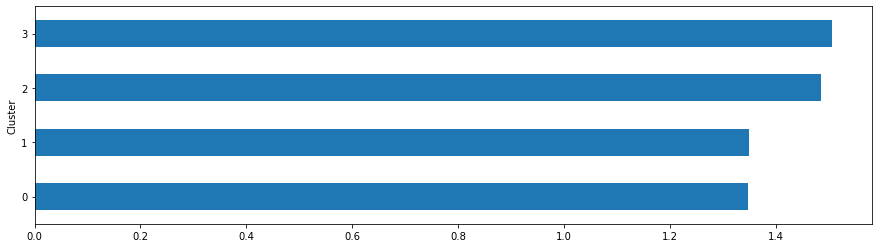

In [126]:
fig = plt.figure()
fig.set_size_inches(15,4)

d = final_assigments.groupby(['Cluster']).mean()['avg_spend_per_item']

p = d.plot(kind='barh')

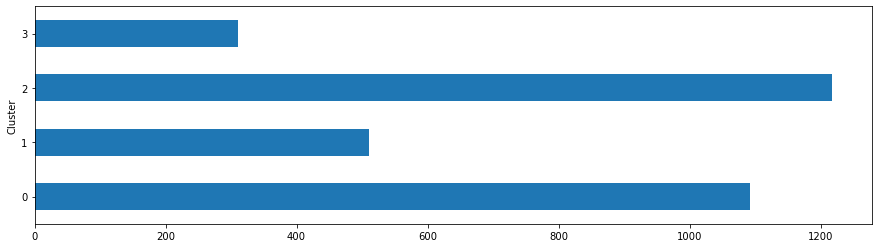

In [123]:
fig = plt.figure()
fig.set_size_inches(15,4)

d = final_assigments.groupby(['Cluster']).mean()['total_spend']

p = d.plot(kind='barh')

<Figure size 1080x288 with 0 Axes>

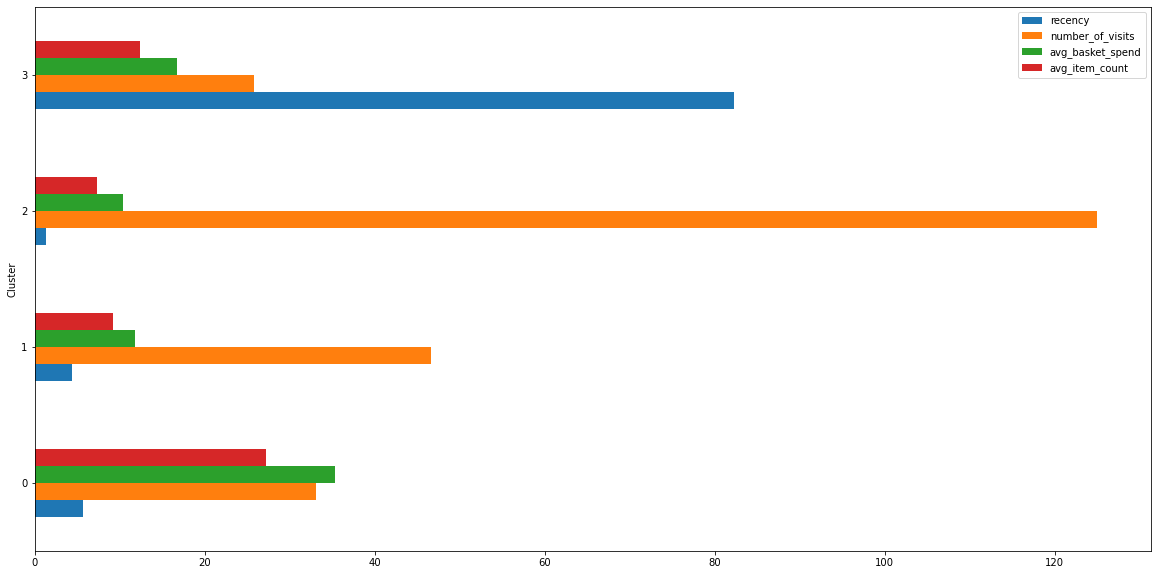

In [127]:
fig = plt.figure()
fig.set_size_inches(15,4)

d = final_assigments.groupby(['Cluster']).mean().drop(['total_spend','avg_spend_per_item'], 1)

p = d.plot(kind='barh')

##  3.Topic Modeling of each cluster

Fisrtly add new column to DataFrame *df_category_spends*

In [128]:
df_behaviour = final_assigments
df_category_spends.set_index('customer_number', inplace=True)
df_category_spends

,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
14,7.40,0.0,25.53,236.09,0.00,1.25,189.80,20.57,14.48,88.35,25.40,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66
45,9.45,0.0,126.32,181.58,0.00,0.00,0.00,4.51,30.21,100.31,13.76,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37
52,1.04,0.0,3.29,5.19,26.24,0.00,0.00,1.78,56.27,1.08,13.63,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90
61,14.08,0.0,69.29,61.15,3.81,0.00,13.00,21.96,83.74,66.74,19.63,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19
63,12.12,0.0,75.66,43.60,11.67,0.00,0.00,3.88,22.01,14.39,7.47,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,5.97,100.0,52.25,42.28,0.00,0.00,39.91,14.30,10.04,3.50,1.49,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00
16301,5.11,0.0,110.13,23.19,0.39,0.00,24.70,7.64,16.16,29.22,8.87,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48
16303,14.77,0.0,13.00,38.81,8.63,0.00,0.00,1.79,34.32,109.44,8.44,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10


In [129]:
df_category_spends['Cluster'] = df_behaviour['Cluster']

In [130]:
df_category_spends[df_category_spends['Cluster'] == 1]

,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,...,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS,Cluster
customer_number,,,,,,,,,,,,,,,,,,,,,
14,7.40,0.0,25.53,236.09,0.00,1.25,189.80,20.57,14.48,88.35,...,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66,1
45,9.45,0.0,126.32,181.58,0.00,0.00,0.00,4.51,30.21,100.31,...,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37,1
52,1.04,0.0,3.29,5.19,26.24,0.00,0.00,1.78,56.27,1.08,...,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90,1
61,14.08,0.0,69.29,61.15,3.81,0.00,13.00,21.96,83.74,66.74,...,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19,1
63,12.12,0.0,75.66,43.60,11.67,0.00,0.00,3.88,22.01,14.39,...,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,5.97,100.0,52.25,42.28,0.00,0.00,39.91,14.30,10.04,3.50,...,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00,1
16301,5.11,0.0,110.13,23.19,0.39,0.00,24.70,7.64,16.16,29.22,...,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48,1
16303,14.77,0.0,13.00,38.81,8.63,0.00,0.00,1.79,34.32,109.44,...,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10,1


Create 4 dataframes for each cluster

In [131]:
df0 = df_category_spends[df_category_spends['Cluster'] == 0]
df1 = df_category_spends[df_category_spends['Cluster'] == 1]
df2 = df_category_spends[df_category_spends['Cluster'] == 2]
df3 = df_category_spends[df_category_spends['Cluster'] == 3]
print(len(df0) + len(df1) + len(df2) + len(df3))

3000


As variable already named, delete 'Cluster' column

In [132]:
df0.drop('Cluster', axis=1, inplace=True)

In [133]:
df1.drop('Cluster', axis=1, inplace=True)
df1

,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
14,7.40,0.0,25.53,236.09,0.00,1.25,189.80,20.57,14.48,88.35,25.40,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66
45,9.45,0.0,126.32,181.58,0.00,0.00,0.00,4.51,30.21,100.31,13.76,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37
52,1.04,0.0,3.29,5.19,26.24,0.00,0.00,1.78,56.27,1.08,13.63,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90
61,14.08,0.0,69.29,61.15,3.81,0.00,13.00,21.96,83.74,66.74,19.63,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19
63,12.12,0.0,75.66,43.60,11.67,0.00,0.00,3.88,22.01,14.39,7.47,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,5.97,100.0,52.25,42.28,0.00,0.00,39.91,14.30,10.04,3.50,1.49,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00
16301,5.11,0.0,110.13,23.19,0.39,0.00,24.70,7.64,16.16,29.22,8.87,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48
16303,14.77,0.0,13.00,38.81,8.63,0.00,0.00,1.79,34.32,109.44,8.44,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10


In [134]:
df2.drop('Cluster', axis=1, inplace=True)
df3.drop('Cluster', axis=1, inplace=True)

In [135]:
# NaN or unavailable value check
print(df0.isnull().sum(axis=0))
print(df1.isnull().sum(axis=0))
print(df2.isnull().sum(axis=0))
print(df3.isnull().sum(axis=0))

BAKERY                  0
CASHPOINT               0
CONFECTIONARY           0
DAIRY                   0
DELI                    0
DISCOUNT_BAKERY         0
DRINKS                  0
FROZEN                  0
FRUIT_VEG               0
GROCERY_FOOD            0
GROCERY_HEALTH_PETS     0
LOTTERY                 0
MEAT                    0
NEWSPAPERS_MAGAZINES    0
PRACTICAL_ITEMS         0
PREPARED_MEALS          0
SEASONAL_GIFTING        0
SOFT_DRINKS             0
TOBACCO                 0
WORLD_FOODS             0
dtype: int64
BAKERY                  0
CASHPOINT               0
CONFECTIONARY           0
DAIRY                   0
DELI                    0
DISCOUNT_BAKERY         0
DRINKS                  0
FROZEN                  0
FRUIT_VEG               0
GROCERY_FOOD            0
GROCERY_HEALTH_PETS     0
LOTTERY                 0
MEAT                    0
NEWSPAPERS_MAGAZINES    0
PRACTICAL_ITEMS         0
PREPARED_MEALS          0
SEASONAL_GIFTING        0
SOFT_DRINKS             0

In [136]:
print(df0.min())
print(df1.min())
print(df2.min())
print(df3.min())

BAKERY                  0.00
CASHPOINT               0.00
CONFECTIONARY           1.06
DAIRY                   0.00
DELI                    0.00
DISCOUNT_BAKERY         0.00
DRINKS                  0.00
FROZEN                  0.00
FRUIT_VEG               0.00
GROCERY_FOOD            7.26
GROCERY_HEALTH_PETS     0.00
LOTTERY                 0.00
MEAT                    0.00
NEWSPAPERS_MAGAZINES    0.00
PRACTICAL_ITEMS         0.00
PREPARED_MEALS          0.00
SEASONAL_GIFTING        0.00
SOFT_DRINKS             0.00
TOBACCO                 0.00
WORLD_FOODS             0.00
dtype: float64
BAKERY                  0.0
CASHPOINT               0.0
CONFECTIONARY           0.0
DAIRY                   0.0
DELI                    0.0
DISCOUNT_BAKERY         0.0
DRINKS                  0.0
FROZEN                  0.0
FRUIT_VEG               0.0
GROCERY_FOOD            0.0
GROCERY_HEALTH_PETS     0.0
LOTTERY                 0.0
MEAT                    0.0
NEWSPAPERS_MAGAZINES    0.0
PRACTICAL_ITE

Standadize the data as above.

In [137]:
scaler = MinMaxScaler((1, np.e))
std_df0 = pd.DataFrame(scaler.fit_transform(df0), columns=df0.columns)

std_df0 = np.log(std_df0)
std_df0.set_index(df0.index.values, inplace=True)
std_df0.describe()

,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,0.129735,0.012856,0.081365,0.271115,0.091272,0.020767,0.122282,0.101106,0.252918,0.285429,0.218535,0.008489,0.171756,0.067579,0.060848,0.086829,0.072121,0.063325,0.020891,0.064072
std,0.143563,0.069706,0.090264,0.172245,0.138101,0.097734,0.188443,0.112640,0.177282,0.175828,0.181023,0.061743,0.167559,0.114040,0.122660,0.108474,0.132073,0.091340,0.076000,0.117562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045627,0.000000,0.032554,0.146489,0.000000,0.000000,0.000000,0.033592,0.122431,0.149320,0.084439,0.000000,0.056849,0.000000,0.000000,0.021581,0.000000,0.010174,0.000000,0.000000
50%,0.092964,0.000000,0.060944,0.229512,0.032459,0.000000,0.044941,0.071841,0.210473,0.257293,0.170335,0.000000,0.126514,0.028511,0.000000,0.055249,0.021723,0.031689,0.000000,0.026258
75%,0.159219,0.000000,0.100773,0.358670,0.135109,0.000000,0.153600,0.130613,0.336915,0.398008,0.299759,0.000000,0.243058,0.083965,0.071367,0.107878,0.085503,0.085898,0.003696,0.074772
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
std_df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
std_df1 = np.log(std_df1)
std_df1.set_index(df1.index.values, inplace=True)

std_df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
std_df2 = np.log(std_df2)
std_df2.set_index(df2.index.values, inplace=True)

std_df3 = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)
std_df3 = np.log(std_df3)
std_df3.set_index(df3.index.values, inplace=True)

display(df1)
display(df2)
display(df3)

,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
14,7.40,0.0,25.53,236.09,0.00,1.25,189.80,20.57,14.48,88.35,25.40,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66
45,9.45,0.0,126.32,181.58,0.00,0.00,0.00,4.51,30.21,100.31,13.76,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37
52,1.04,0.0,3.29,5.19,26.24,0.00,0.00,1.78,56.27,1.08,13.63,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90
61,14.08,0.0,69.29,61.15,3.81,0.00,13.00,21.96,83.74,66.74,19.63,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19
63,12.12,0.0,75.66,43.60,11.67,0.00,0.00,3.88,22.01,14.39,7.47,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,5.97,100.0,52.25,42.28,0.00,0.00,39.91,14.30,10.04,3.50,1.49,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00
16301,5.11,0.0,110.13,23.19,0.39,0.00,24.70,7.64,16.16,29.22,8.87,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48
16303,14.77,0.0,13.00,38.81,8.63,0.00,0.00,1.79,34.32,109.44,8.44,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10


,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
156,45.83,0.0,31.43,100.26,8.97,0.00,77.10,62.52,98.86,138.19,43.12,0.0,15.45,24.86,17.57,4.88,13.59,9.05,0.00,0.45
182,14.97,0.0,59.30,44.74,2.37,0.00,10.20,0.00,13.56,103.45,3.57,0.0,0.00,11.70,0.00,1.65,0.00,1.01,0.00,4.53
186,6.39,0.0,72.77,118.89,0.00,0.00,3.01,14.12,1.61,72.50,17.62,0.0,2.69,10.20,0.00,38.40,0.00,10.60,0.00,12.74
206,14.43,0.0,62.76,50.37,81.22,0.00,6.03,34.15,227.20,86.34,28.86,0.0,39.15,1.28,0.00,37.91,16.50,82.87,0.00,0.00
218,47.51,0.0,70.55,66.27,9.95,0.00,0.00,15.57,230.97,148.56,44.53,0.0,6.55,15.50,4.83,6.84,10.45,2.24,0.00,5.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16043,28.63,0.0,224.31,179.87,127.23,0.00,0.00,170.11,49.59,84.23,74.26,14.0,0.00,54.08,0.76,3.18,46.77,18.03,8.52,0.19
16165,5.85,0.0,109.71,173.21,8.37,0.00,10.89,18.79,64.72,45.17,29.08,0.0,0.00,3.37,1.69,11.63,0.00,62.36,193.66,3.83
16195,0.00,20.0,4.57,135.20,6.09,5.59,0.00,4.38,148.70,172.95,59.27,28.0,0.00,60.69,0.00,22.22,0.00,0.50,0.00,30.39


,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,GROCERY_FOOD,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
customer_number,,,,,,,,,,,,,,,,,,,,
110,12.14,0.0,11.69,24.82,8.83,0.0,15.63,9.59,23.15,10.69,10.97,2.0,14.40,2.40,0.00,23.50,1.15,0.88,0.00,2.15
149,13.13,0.0,45.84,22.67,0.00,0.0,0.00,9.38,12.22,23.30,19.67,0.0,30.95,1.00,0.00,11.12,1.69,0.00,0.00,1.19
166,11.28,20.0,30.26,31.99,6.65,0.0,6.37,10.75,15.24,35.17,42.12,0.0,43.73,13.36,0.00,16.89,0.00,12.88,0.00,7.62
187,28.13,0.0,39.91,135.16,0.00,0.0,11.84,46.00,57.81,66.30,93.83,0.0,76.43,2.54,0.00,56.55,4.54,29.11,0.00,0.99
305,32.99,175.0,8.11,10.71,0.00,0.0,0.00,5.89,0.00,6.17,36.44,62.0,2.29,6.95,0.00,0.00,0.00,5.94,18.20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15843,4.41,0.0,10.68,11.59,1.89,6.2,0.00,0.00,0.99,14.72,8.93,0.0,8.69,3.07,0.00,11.28,0.00,1.61,0.00,0.00
16012,0.55,0.0,70.76,33.54,1.98,0.0,117.18,0.99,8.51,9.54,10.18,0.0,0.00,2.45,0.00,3.23,0.00,0.00,0.00,0.00
16031,13.80,25.0,18.49,9.60,0.00,0.0,43.21,29.81,3.44,9.78,6.37,0.0,0.00,2.25,1.95,5.08,0.00,32.91,0.00,0.00


In [139]:
# a graphing function from lab session
def display_factors(model, original_features):
   dimensions = range(1, len(model.components_) + 1)
   topics = pd.DataFrame(model.components_, columns = original_features)
   fig, ax = plt.subplots(figsize = (14,8))
   topics.plot(ax = ax, kind = 'bar');
   ax.set_ylabel("Original Feature Weights")
   ax.set_xlabel("Derived Factors")
   ax.set_xticklabels(dimensions, rotation=0)

Then try PCA with 3 components

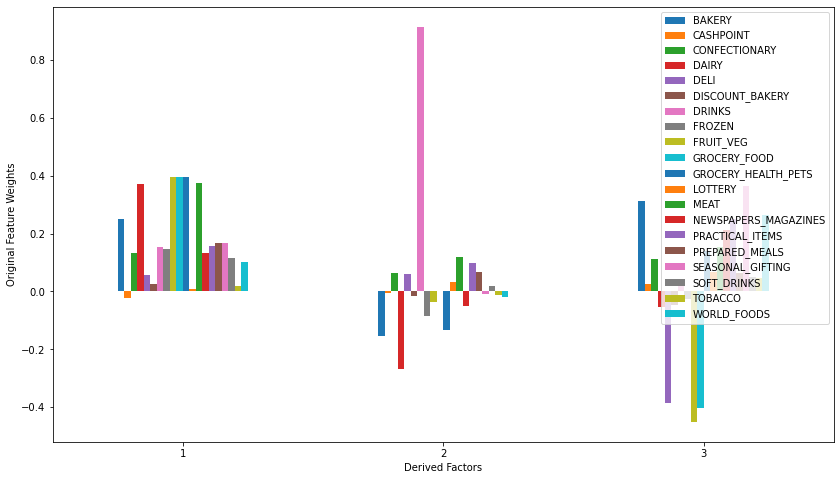

In [140]:
pca = PCA(n_components=3)
pca.fit(std_df0)
display_factors(pca, std_df0.columns)

As there are negative components in PCA, fit NMF with the dataset

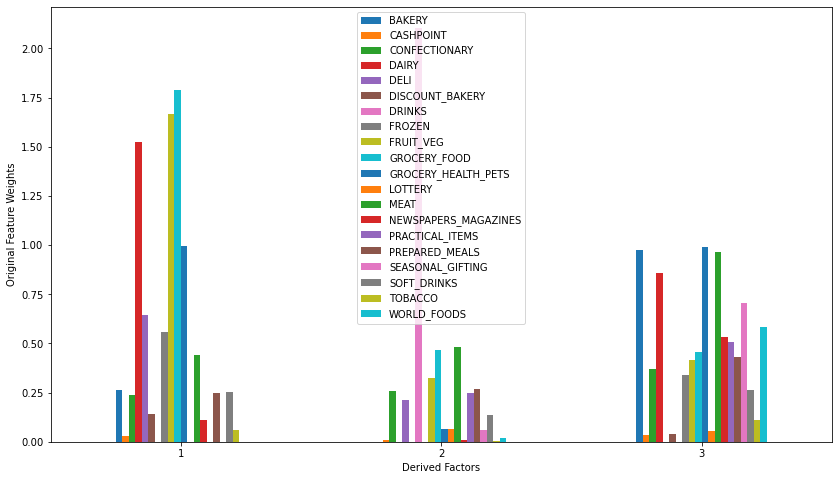

In [141]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf.fit(std_df0)

nmf_results = display_factors(nmf, std_df0.columns)

Then try LDA

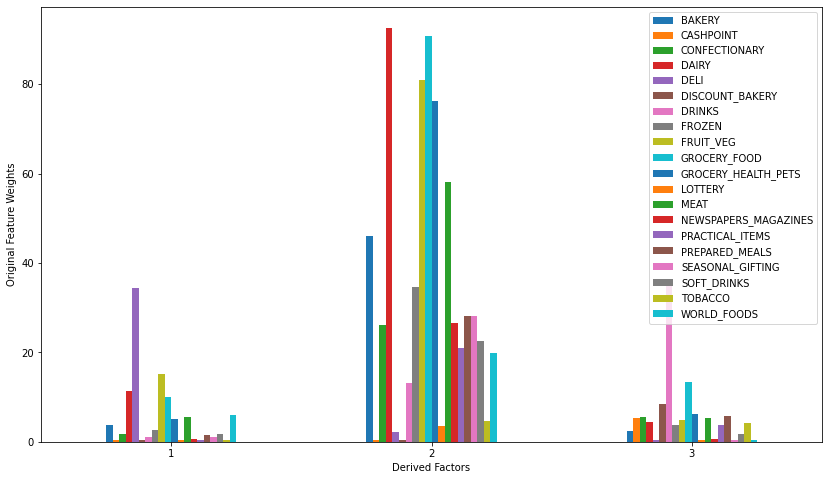

In [142]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(std_df0)
lda_results = display_factors(lda, std_df0.columns)

Compared with NMF, I prefer LDA for cluster 0 for more distinctive features and 396 customers.

Then apply NMF and LDA to cluster 1 as well.

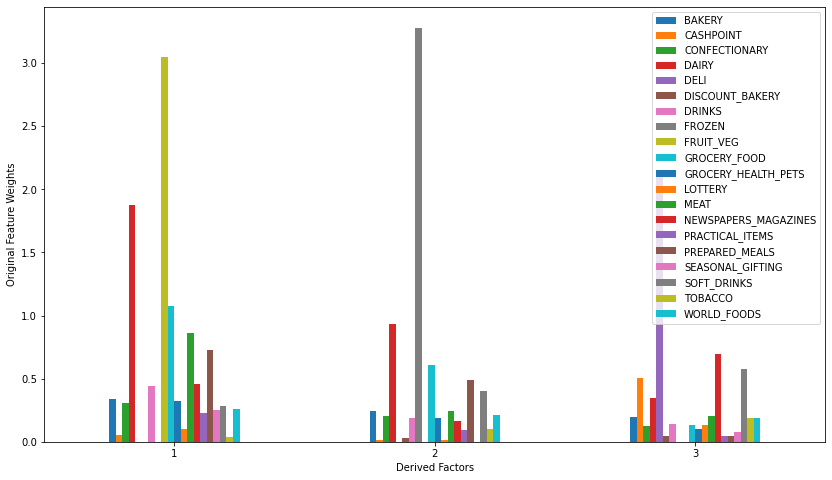

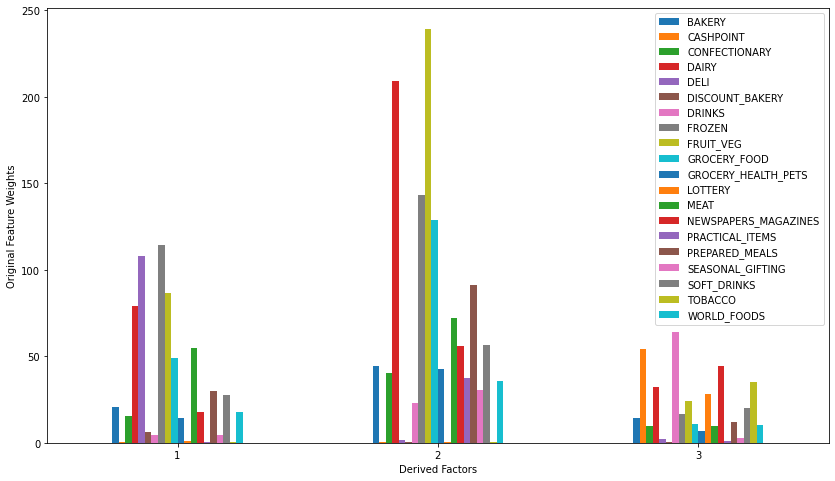

In [150]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(std_df1)

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(std_df1)

nmf_results = display_factors(nmf, std_df1.columns)
lda_results = display_factors(lda, std_df1.columns)

Choose NMF after analytics.

Then apply them to cluster 2.

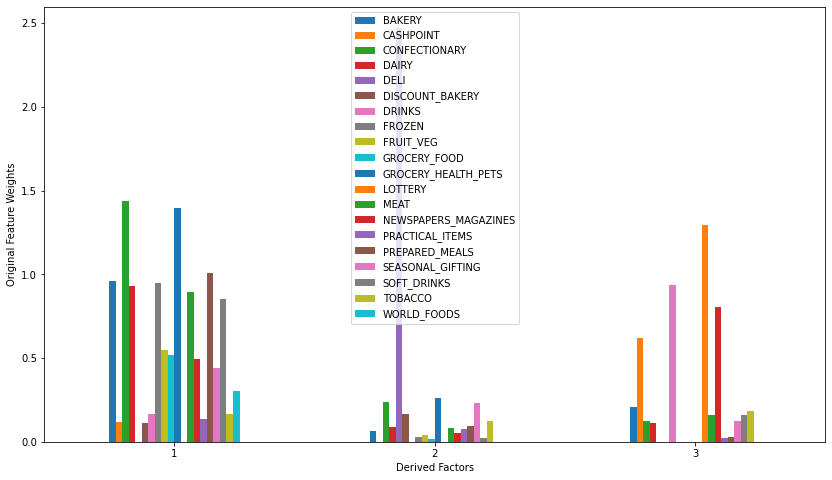

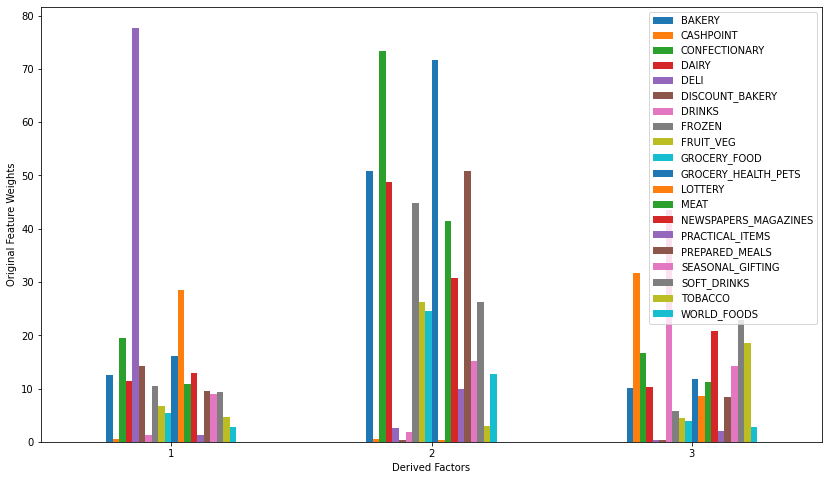

In [144]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(std_df2)

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(std_df2)

nmf_results = display_factors(nmf, std_df2.columns)
lda_results = display_factors(lda, std_df2.columns)

Both is okay.

Then apply to cluster 3.

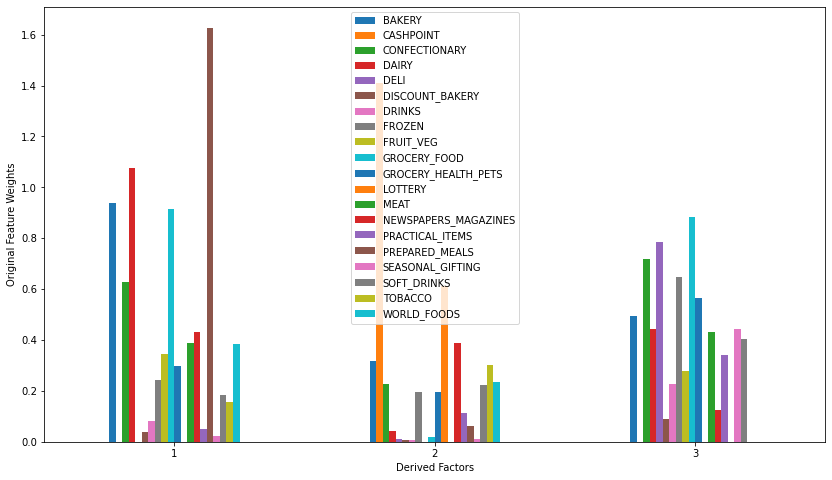

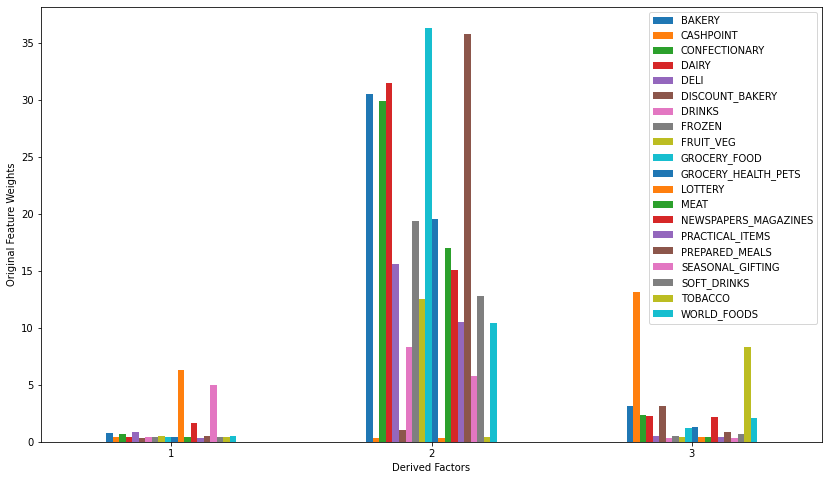

In [145]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(std_df3)

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(std_df3)

nmf_results = display_factors(nmf, std_df3.columns)
lda_results = display_factors(lda, std_df3.columns)

LDA was chosen.